In [1]:
from scipy.io import arff
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from typing import Optional, Tuple


sns.set()
sns.set(rc={"figure.figsize": (8, 5)})

In [2]:
data = arff.loadarff("../data/dataset/CEE_DATA.arff")
df = pd.DataFrame(data[0]).astype(str)
df.columns = df.columns.str.lower()
df.head()

,performance,gender,caste,coaching,time,class_ten_education,twelve_education,medium,class_ x_percentage,class_xii_percentage,father_occupation,mother_occupation
0,Excellent,male,General,NO,ONE,SEBA,AHSEC,ENGLISH,Excellent,Excellent,DOCTOR,OTHERS
1,Excellent,male,OBC,WA,TWO,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,HOUSE_WIFE
2,Excellent,male,OBC,OA,TWO,OTHERS,CBSE,ENGLISH,Excellent,Excellent,BUSINESS,HOUSE_WIFE
3,Excellent,male,General,WA,ONE,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,SCHOOL_TEACHER
4,Excellent,male,General,OA,TWO,SEBA,CBSE,ENGLISH,Excellent,Excellent,COLLEGE_TEACHER,HOUSE_WIFE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   performance           666 non-null    object
 1   gender                666 non-null    object
 2   caste                 666 non-null    object
 3   coaching              666 non-null    object
 4   time                  666 non-null    object
 5   class_ten_education   666 non-null    object
 6   twelve_education      666 non-null    object
 7   medium                666 non-null    object
 8   class_ x_percentage   666 non-null    object
 9   class_xii_percentage  666 non-null    object
 10  father_occupation     666 non-null    object
 11  mother_occupation     666 non-null    object
dtypes: object(12)
memory usage: 62.6+ KB


Todos os dados são categóricos e não existem valores faltantes.

# Pre Processamento

## Performance

In [4]:
df["performance"].unique()

array(['Excellent', 'Vg', 'Good', 'Average'], dtype=object)

In [5]:
df["performance"].replace({"Vg": "Very Good"}, inplace=True)
df["performance"].unique()

array(['Excellent', 'Very Good', 'Good', 'Average'], dtype=object)

In [6]:
df["performance"] = pd.Categorical(
    df["performance"], categories=["Average", "Good", "Very Good", "Excellent"], ordered=True
)
df["performance"].unique()

['Excellent', 'Very Good', 'Good', 'Average']
Categories (4, object): ['Average' < 'Good' < 'Very Good' < 'Excellent']

## Caste

- SC – Scheduled Castes
- ST – Scheduled Tribes
- OBC – Other Backward Classes

In [7]:
df["caste"].unique()

array(['General', 'OBC', 'SC', 'ST'], dtype=object)

## Coaching

- No
- OA
- WA

In [8]:
df["coaching"].unique()

array(['NO', 'WA', 'OA'], dtype=object)

In [9]:
df["coaching"] = pd.Categorical(df["coaching"], categories=["NO", "WA", "OA"], ordered=True)
df["coaching"].unique()

['NO', 'WA', 'OA']
Categories (3, object): ['NO' < 'WA' < 'OA']

In [10]:
df["coaching"].dtype

CategoricalDtype(categories=['NO', 'WA', 'OA'], ordered=True)

# Time

In [11]:
df["time"].unique()

array(['ONE', 'TWO', 'THREE', 'FOUR', 'FIVE', 'SEVEN'], dtype=object)

In [12]:
df["time"] = pd.Categorical(df["time"], categories=["ONE", "TWO", "THREE", "FOUR", "FIVE", "SEVEN"], ordered=True)
df["time"].unique()

['ONE', 'TWO', 'THREE', 'FOUR', 'FIVE', 'SEVEN']
Categories (6, object): ['ONE' < 'TWO' < 'THREE' < 'FOUR' < 'FIVE' < 'SEVEN']

# EAD

## Funções para plot

In [13]:
def normalized_catplot(
    df: pd.DataFrame,
    feature: str,
    group: str,
    figsize: Optional[Tuple[int]] = (9, 4),
    ylim: Optional[int] = 100,
    title: Optional[str] = "",
    **kwargs
) -> None:
    normalized_df = df.groupby(group)[feature].value_counts(normalize=True)
    normalized_df = normalized_df.mul(100)
    normalized_df = normalized_df.rename("percent").reset_index()

    if isinstance(df["performance"].dtype, pd.CategoricalDtype):
        hue_order = normalized_df[feature].unique().categories
    else:
        hue_order = normalized_df[feature].unique()

    graph = sns.catplot(
        data=normalized_df,
        x=group,
        y="percent",
        hue=feature,
        kind="bar",
        hue_order=hue_order,
        legend_out=False,
        **kwargs
    )

    graph.fig.set_size_inches(*figsize)
    graph.ax.set_ylim(0, ylim)
    graph.ax.set_title(title)

    for p in graph.ax.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        txt = p.get_height().round(1)
        graph.ax.annotate(
            txt,
            (x, y + 2),
            ha="center",
            va="center",
            fontsize=9,
            color="#555",
            fontweight="normal",
        )

## Composição do dataset

In [14]:
columns = ["performance", "gender", "caste", "coaching"]

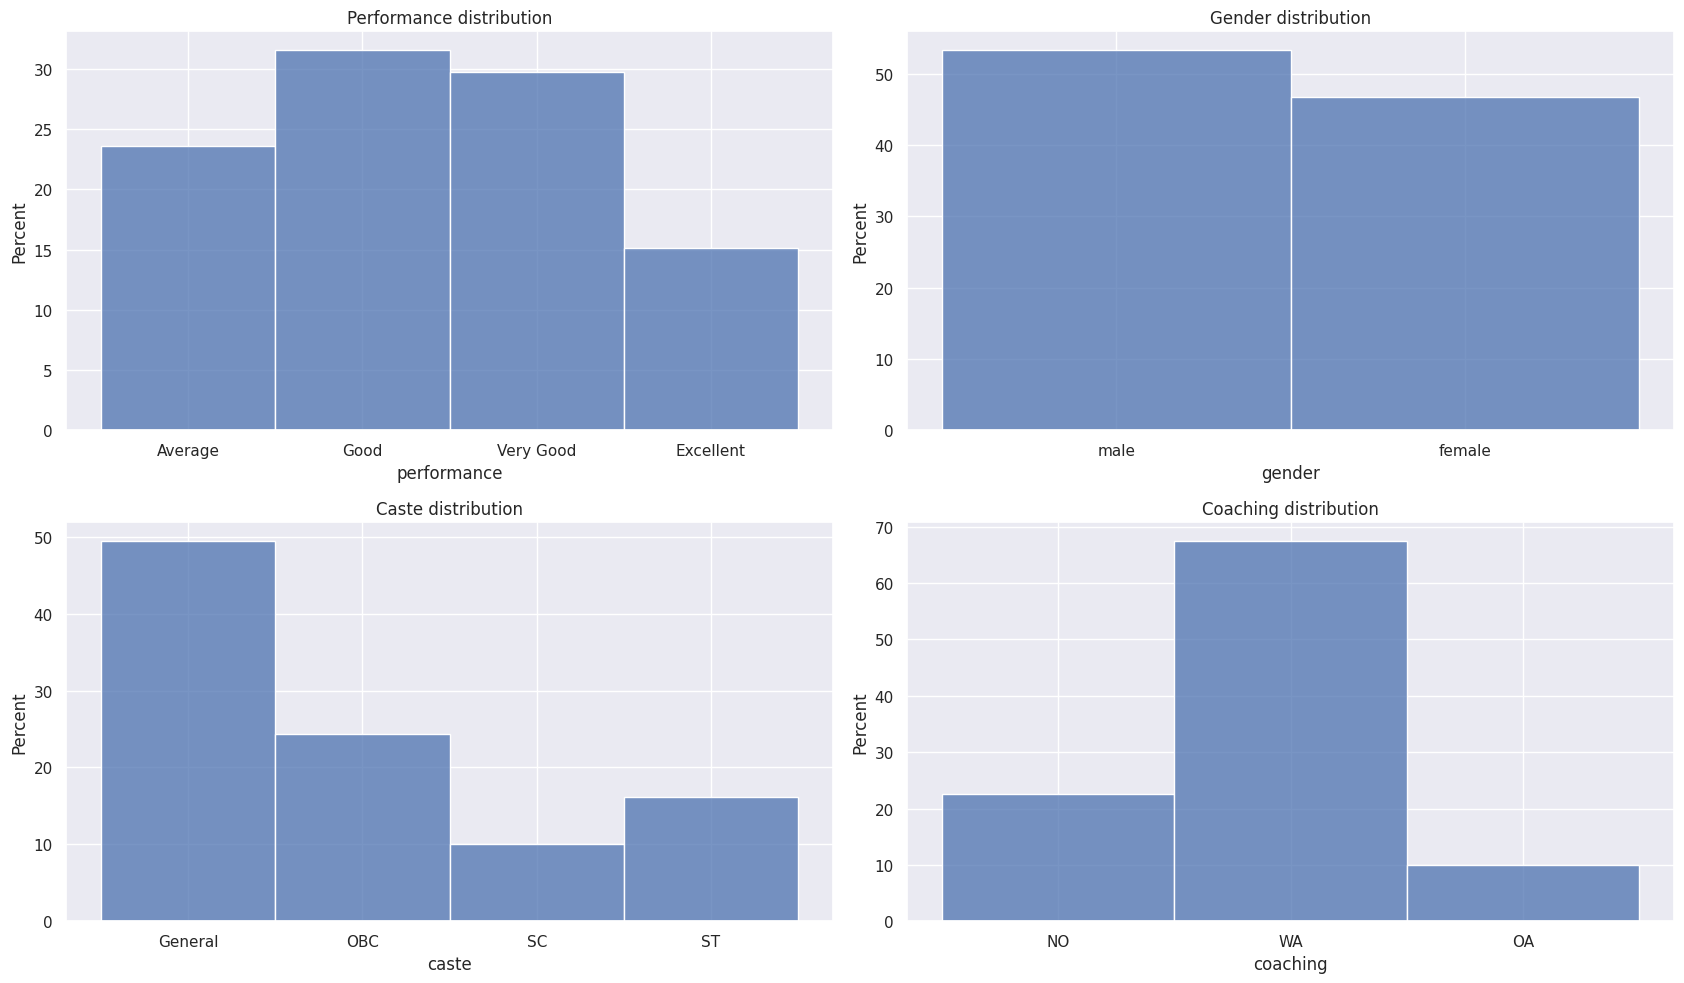

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(17, 10))
axes = axes.ravel()
for ax, column in zip(axes, columns):
    sns.histplot(data=df, x=column, ax=ax, stat="percent")
    ax.set_title(column.title() + " distribution")

fig.tight_layout()

## Performance

### Performance por Casta

/home/tiago/.virtualenvs/unicamp-mo810/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


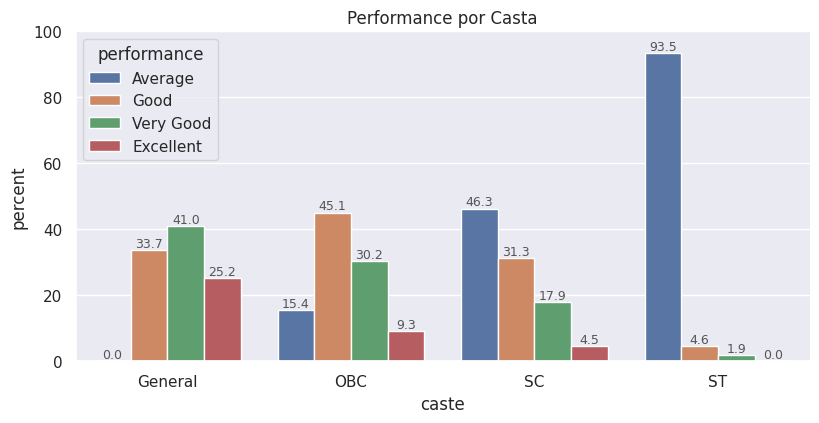

In [17]:
group = "caste"
feature = "performance"

normalized_catplot(df=df, group=group, feature=feature, title="Performance por Casta")

### Performance por Gênero

/home/tiago/.virtualenvs/unicamp-mo810/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


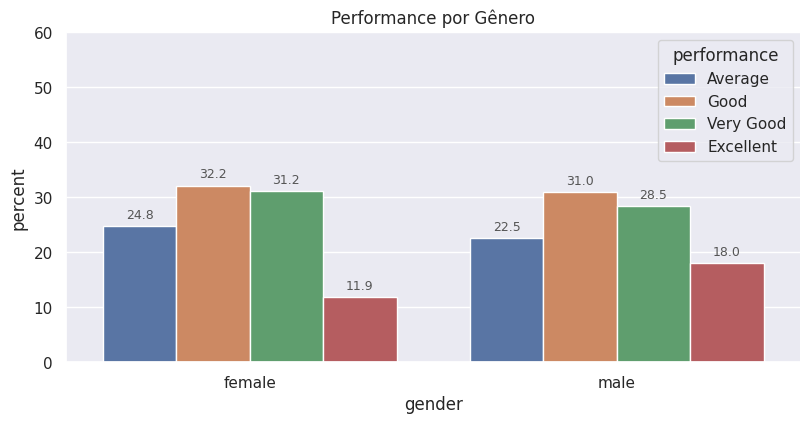

In [19]:
group = "gender"
feature = "performance"

normalized_catplot(df=df, group=group, feature=feature, ylim=60, title="Performance por Gênero")

Homens possuem uma maior parcela de indivíduos com desempenho excelente.

### Performance por Coaching

/home/tiago/.virtualenvs/unicamp-mo810/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


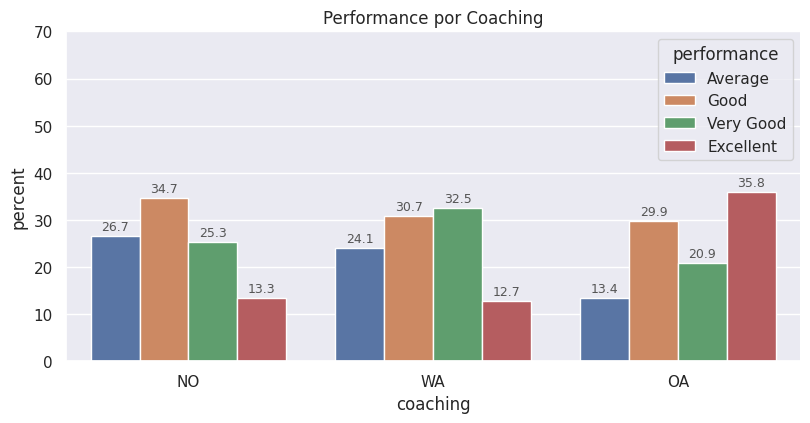

In [21]:
group = "coaching"
feature = "performance"

normalized_catplot(df=df, group=group, feature=feature, ylim=70, title="Performance por Coaching")

### Performance por Tempo

/home/tiago/.virtualenvs/unicamp-mo810/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


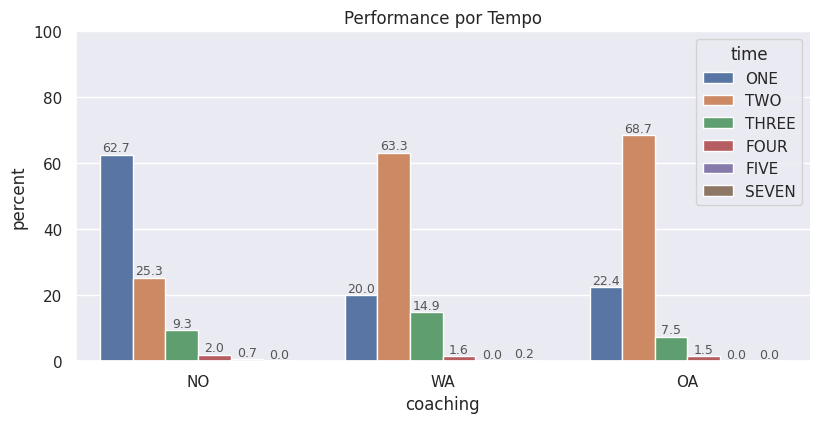

In [22]:
group = "coaching"
feature = "time"

normalized_catplot(df=df, group=group, feature=feature, title="Performance por Tempo")

Indivíduos sem coaching tem o pior desempenho de todos, enquanto que os com coaching OA possuem o melhor desempenho.

## Coaching

### Coaching por Casta

/home/tiago/.virtualenvs/unicamp-mo810/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


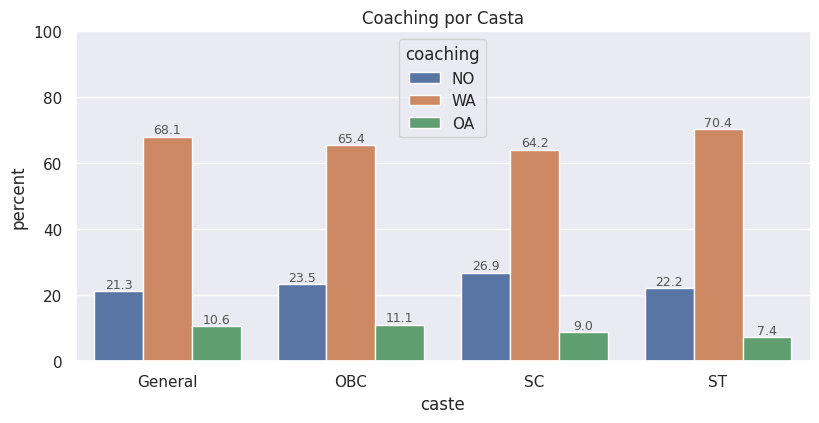

In [23]:
group = "caste"
feature = "coaching"

normalized_catplot(df=df, group=group, feature=feature, title="Coaching por Casta")